In [4]:
# Read Data

import pandas as pd
import numpy as np

df = pd.read_excel('Titanic-Dataset.xlsx')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Dat Cleaning

df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Cabin'].fillna('G6', inplace=True)

/var/folders/cg/w641b5js5jsc7v4nfycnk2c80000gn/T/ipykernel_53434/2847289052.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/var/folders/cg/w641b5js5jsc7v4nfycnk2c80000gn/T/ipykernel_53434/2847289052.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

<Axes: xlabel='Survived'>

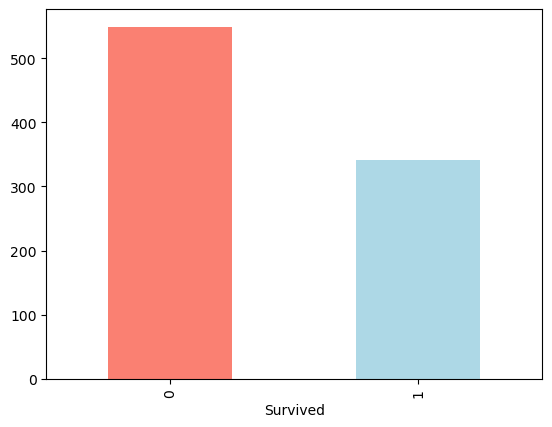

In [8]:
# Data Visualization

df['Survived'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])

In [9]:
# Data Preprocessing

df['Sex'].replace(['male', 'female'], [0, 1], inplace=True)



/var/folders/cg/w641b5js5jsc7v4nfycnk2c80000gn/T/ipykernel_53434/1289761129.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
/var/folders/cg/w641b5js5jsc7v4nfycnk2c80000gn/T/ipykernel_53434/1289761129.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcas

In [10]:
df['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
df['Embarked'].fillna(0, inplace=True)

/var/folders/cg/w641b5js5jsc7v4nfycnk2c80000gn/T/ipykernel_53434/2125952657.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
/var/folders/cg/w641b5js5jsc7v4nfycnk2c80000gn/T/ipykernel_53434/2125952657.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_do

In [11]:
df.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 62.8 KB


In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [14]:
# Model Building

from sklearn.model_selection import train_test_split

X = df.drop(['Survived', 'PassengerId'], axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier 

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

train_pred = model.score(X_train, y_train)
test_pred = model.score(X_test, y_test)

In [16]:
# Validate model performance

from sklearn.metrics import classification_report

print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.83      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



In [1]:
print(classification_report(y_train, model.predict(X_train)))

NameError: name 'classification_report' is not defined

In [18]:
# Mapping objects to integers

embarked_dict = {'S': 0, 
                 'C': 1, 
                 'Q': 2}

sex_dict = {'male': 0,  
            'female': 1}


In [22]:
# Save model objects and mapping variables
import pickle

l = [model, sex_dict, embarked_dict]
pickle.dump(l, open('model.pkl', 'wb'))


NameError: name 'model' is not defined

In [1]:
import sklearn
import sys
print(sklearn.__version__)
print(sys.version)

1.4.2
3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 10:07:17) [Clang 14.0.6 ]


In [15]:
# Import model objects and mapping variables
# Import necessary packages

df.Pclass

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [20]:
# Model deployment

# Gather all variable treatment in one function
def data_preprocessing(df, sex_dict=sex_dict, embarked_dict=embarked_dict):
    
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Sex'].map(sex_dict, inplace=True)
    df['Embarked'].replace(embarked_dict, inplace=True)
    df['Embarked'].fillna(0, inplace=True)
    df.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)
    
    return df   

# Create a function to predict the survival of a passenger based on the model
def predict_survival(df):

    df = data_preprocessing(df)
    X = df.drop(['PassengerId', 'Survived'], axis=1)
    prediction = model.predict(X)
    return prediction
    
    

NameError: name 'sex_dict' is not defined

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [19]:
# import data and test the function
import pandas as pd
import numpy as np


df = pd.read_excel('Titanic-Dataset.xlsx')
prediction = predict_survival(df)

NameError: name 'predict_survival' is not defined